In [1]:
import pandas as pd
import numpy as np 
import os
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('input/train.csv')
test = pd.read_csv('input/test.csv')
spray = pd.read_csv('input/spray.csv')
weather = pd.read_csv('input/weather.csv')
sample = pd.read_csv('input/sampleSubmission.csv')

In [3]:
train.head()

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0


In [4]:
weather.head()

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67,14,51,56,0,2,...,,0,M,0.0,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68,M,51,57,0,3,...,,M,M,M,0.00,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,59,42,51,-3,42,47,14,0,...,BR,0,M,0.0,0.00,29.38,30.09,13.0,4,13.4
3,2,2007-05-02,60,43,52,M,42,47,13,0,...,BR HZ,M,M,M,0.00,29.44,30.08,13.3,2,13.4
4,1,2007-05-03,66,46,56,2,40,48,9,0,...,,0,M,0.0,0.00,29.39,30.12,11.7,7,11.9


## Data Analysis

In [5]:
train.describe()

,Block,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
count,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000
mean,35.687797,41.841139,-87.699908,7.819532,12.853512,0.052446
std,24.339468,0.112742,0.096514,1.452921,16.133816,0.222936
min,10.000000,41.644612,-87.930995,3.000000,1.000000,0.000000
25%,12.000000,41.732984,-87.760070,8.000000,2.000000,0.000000
50%,33.000000,41.846283,-87.694991,8.000000,5.000000,0.000000
75%,52.000000,41.954690,-87.627796,9.000000,17.000000,0.000000
max,98.000000,42.017430,-87.531635,9.000000,50.000000,1.000000


In [6]:
unique_numbers = train.nunique()
unique_numbers

Date                       95
Address                   138
Species                     7
Block                      64
Street                    128
Trap                      136
AddressNumberAndStreet    138
Latitude                  138
Longitude                 138
AddressAccuracy             4
NumMosquitos               50
WnvPresent                  2
dtype: int64

In [7]:
block_trap = train.groupby('Block')['Trap'].nunique()
block_trap.mean()

2.140625

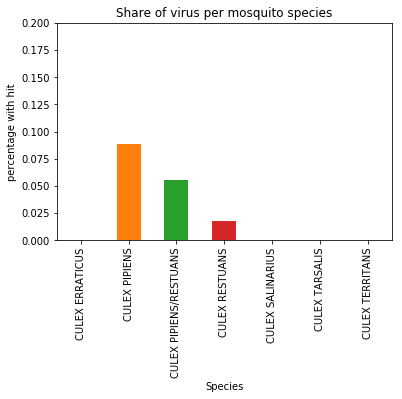

In [8]:
species_present = train.groupby('Species')['WnvPresent'].mean()


plt.figure()
species_present.plot(kind='bar')
plt.ylim([0.0, .2])
plt.xlabel('Species')
plt.ylabel('percentage with hit')
plt.title('Share of virus per mosquito species')
plt.show()
#plt.hist(species_present)

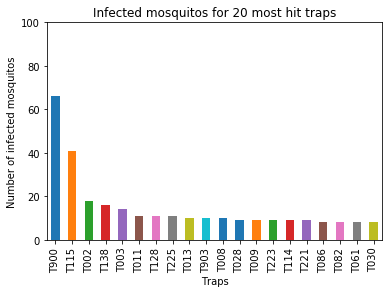

In [9]:
trap_present = train.groupby('Trap')['WnvPresent'].sum()
trap = trap_present.sort_values(ascending = False)[:20]

plt.figure()
trap.plot(kind='bar')
plt.ylim([0.0, 100])
plt.xlabel('Traps')
plt.ylabel('Number of infected mosquitos')
plt.title('Infected mosquitos for 20 most hit traps')
plt.show()

In [10]:
print("The share of infected mosquitos is",sum(train['WnvPresent'])/len(train) * 100,"%")

The share of infected mosquitos is 5.244622120692937 %


## Preprocessing / Feature engineering 

In [11]:
drop_cols = ['Address','AddressNumberAndStreet','AddressAccuracy','NumMosquitos','Street','Block']
drop_cols_test = ['Id','Address','AddressNumberAndStreet','AddressAccuracy','Street','Block']

train = train.drop(columns = drop_cols)
test = test.drop(columns = drop_cols_test)

In [12]:
train['Day'] = train['Date'].apply(lambda x: x.split('-')[2]).astype(int)
train['Month'] = train['Date'].apply(lambda x: x.split('-')[1]).astype(int)
test['Day'] = test['Date'].apply(lambda x: x.split('-')[2]).astype(int)
test['Month'] = test['Date'].apply(lambda x: x.split('-')[1]).astype(int)

Some feature engineering for weather data

In [13]:
weather.columns

Index(['Station', 'Date', 'Tmax', 'Tmin', 'Tavg', 'Depart', 'DewPoint',
       'WetBulb', 'Heat', 'Cool', 'Sunrise', 'Sunset', 'CodeSum', 'Depth',
       'Water1', 'SnowFall', 'PrecipTotal', 'StnPressure', 'SeaLevel',
       'ResultSpeed', 'ResultDir', 'AvgSpeed'],
      dtype='object')

unique values of weather features

In [14]:
dic = {}
for i in weather.columns:
    dic[i] = weather[i].unique()
    
dic

{'Station': array([1, 2]),
 'Date': array(['2007-05-01', '2007-05-02', '2007-05-03', ..., '2014-10-29',
        '2014-10-30', '2014-10-31'], dtype=object),
 'Tmax': array([ 83,  84,  59,  60,  66,  67,  78,  68,  82,  80,  77,  76,  70,
         73,  64,  65,  69,  90,  62,  61,  71,  79,  87,  89,  88,  75,
         85,  86,  81,  72,  63,  91,  92,  93,  74,  94,  54,  53,  56,
         57,  58,  55,  50,  95,  52,  47,  45,  51,  48,  44,  49,  46,
         96,  99, 100, 101,  97,  98, 102, 103, 104,  42,  41]),
 'Tmin': array([50, 52, 42, 43, 46, 48, 49, 51, 53, 54, 47, 60, 61, 63, 56, 59, 44,
        57, 45, 55, 66, 65, 70, 68, 62, 67, 64, 58, 71, 69, 73, 75, 72, 74,
        39, 41, 40, 37, 34, 38, 35, 36, 33, 31, 32, 76, 77, 29, 78, 79, 80,
        81, 82, 83]),
 'Tavg': array(['67', '68', '51', '52', '56', '58', 'M', '60', '59', '65', '70',
        '69', '71', '61', '55', '57', '73', '72', '53', '62', '63', '74',
        '75', '78', '76', '77', '66', '80', '64', '81', '82', '79'

In [15]:
drop_weather = ['Depart','Heat','Cool','CodeSum','StnPressure','SeaLevel','ResultSpeed',
                'ResultDir','AvgSpeed','SnowFall','Water1','Depth','WetBulb']
weather = weather.drop(columns = drop_weather)

In [16]:
weather = weather.replace('-',0)
weather = weather.replace('  T',0.005)
weather = weather.replace('M',0) ## Just for PrecipTotal and there we assume that nothing has been observed
weather['Tavg'] = ((weather['Tmax'] + weather['Tmin']) / 2).astype(int)

In [17]:
weather.head()

,Station,Date,Tmax,Tmin,Tavg,DewPoint,Sunrise,Sunset,PrecipTotal
0,1,2007-05-01,83,50,66,51,0448,1849,0.00
1,2,2007-05-01,84,52,68,51,0,0,0.00
2,1,2007-05-02,59,42,50,42,0447,1850,0.00
3,2,2007-05-02,60,43,51,42,0,0,0.00
4,1,2007-05-03,66,46,56,40,0446,1851,0.00


In [18]:
for i in weather.columns[2:]:
    weather[i] = pd.to_numeric(weather[i])

In [19]:
aggregations = {'Tmax': max,
               'Tmin': min,
               'Tavg': 'mean',
               'Sunrise': max,
               'Sunset': max,
               'DewPoint': max,
               'PrecipTotal':max}

weather_agg = weather.groupby('Date').agg(aggregations)

In [20]:
dayhours = []
daymin = []
daylen = []
for i in range(len(weather_agg)):
    number = weather_agg['Sunset'][i] - weather_agg['Sunrise'][i]
    dayhours.append(int(str(number)[:2]))
    daymin.append(int(str(number)[3:]) / 60)
    daylen.append(dayhours[i] + daymin[i])
    
weather_agg['daylen'] = [ round(elem, 3) for elem in daylen ]
weather_agg = weather_agg.drop(columns = ['Sunrise','Sunset'])

In [21]:
weather_agg.head()

,Tmax,Tmin,Tavg,DewPoint,PrecipTotal,daylen
Date,,,,,,
2007-05-01,84,50,67.0,51,0.000,14.017
2007-05-02,60,42,50.5,42,0.000,14.050
2007-05-03,67,46,56.5,40,0.000,14.083
2007-05-04,78,49,60.5,42,0.005,14.133
2007-05-05,66,53,59.5,39,0.005,14.000


In [22]:
weather_agg.describe()

,Tmax,Tmin,Tavg,DewPoint,PrecipTotal,daylen
count,1472.000000,1472.000000,1472.000000,1472.000000,1472.000000,1472.000000
mean,76.740489,56.634511,66.736073,54.015625,0.176423,13.288326
std,11.433218,10.324950,10.490331,10.677290,0.483415,1.569914
min,42.000000,29.000000,35.500000,23.000000,0.000000,10.000000
25%,69.000000,49.000000,59.500000,47.000000,0.000000,12.083000
50%,79.000000,58.000000,68.500000,55.000000,0.005000,14.025000
75%,85.000000,65.000000,75.000000,62.000000,0.110000,14.150000
max,104.000000,82.000000,92.500000,75.000000,6.860000,15.150000


## Model

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, RandomizedSearchCV
from sklearn.metrics import f1_score,roc_curve, auc,confusion_matrix

In [24]:
new_train = pd.merge(train,weather_agg, on = 'Date', how = 'inner')
print("The shape of training data is",new_train.shape)

new_test = pd.merge(test,weather_agg, on = 'Date', how = 'inner')
print("The shape of test data is",new_test.shape)

The shape of training data is (10506, 14)
The shape of test data is (116293, 13)


In [25]:
new_train = new_train.drop(columns = ['Date'])
new_test = new_test.drop(columns = ['Date'])

One hot encoding of categorical variables to be used in 

In [26]:
new_train = pd.get_dummies(new_train,columns = ['Species','Trap','Month'])
new_test = pd.get_dummies(new_test,columns = ['Species','Trap','Month'])

In [27]:
new_train.head()

,Latitude,Longitude,WnvPresent,Day,Tmax,Tmin,Tavg,DewPoint,PrecipTotal,daylen,...,Trap_T237,Trap_T238,Trap_T900,Trap_T903,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10
0,41.954690,-87.800991,0,29,88,60,75.0,59,0.0,14.1,...,0,0,0,0,1,0,0,0,0,0
1,41.954690,-87.800991,0,29,88,60,75.0,59,0.0,14.1,...,0,0,0,0,1,0,0,0,0,0
2,41.994991,-87.769279,0,29,88,60,75.0,59,0.0,14.1,...,0,0,0,0,1,0,0,0,0,0
3,41.974089,-87.824812,0,29,88,60,75.0,59,0.0,14.1,...,0,0,0,0,1,0,0,0,0,0
4,41.974089,-87.824812,0,29,88,60,75.0,59,0.0,14.1,...,0,0,0,0,1,0,0,0,0,0


Taking into account only the features, that are available for both training and test set

In [28]:
y = new_train.pop('WnvPresent')
unique_cols = [col for col in new_train.columns if col in new_test.columns]
unique_cols2 = [col for col in new_test.columns if col in new_train.columns]

X = new_train[unique_cols]
test_set = new_test[unique_cols2]

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

First random forest classifier

In [30]:
rf1 = RandomForestClassifier(n_estimators=3000)
rf1.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=3000, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

Assigning the hyperparameters to be used in the grid search

In [55]:
bootstrap = [True, False]
n_estimators = [int(x) for x in np.linspace(2500,4000,num = 10)]
max_depth = [int(x) for x in np.linspace(10,20, num = 5)]
max_features = ['auto','sqrt']
min_samples_split = [2, 5, 10]
class_weight = [{0:1,1:12}]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'bootstrap': bootstrap,
               'class_weight': class_weight}

rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 5, cv = 5, n_jobs = -1)
rf_random.fit(X_train,y_train)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid='warn', n_iter=5, n_jobs=-1,
          param_distributions={'n_estimators': [2500, 2666, 2833, 3000, 3166, 3333, 3500, 3666, 3833, 4000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 12, 14, 16, 18], 'min_samples_split': [2, 5, 10], 'bootstrap': [True, False], 'class_weight': [{0: 1, 1: 12}]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [56]:
rf_random.best_params_

{'n_estimators': 3833,
 'min_samples_split': 10,
 'max_features': 'auto',
 'max_depth': 16,
 'class_weight': {0: 1, 1: 12},
 'bootstrap': True}

## Model evaluation

In [57]:
y_score1 = rf1.predict_proba(X_test)[:,1]
y_pred1 = rf1.predict(X_test)

conf1 = confusion_matrix(y_test,y_pred1)# a lot of false negatives due to class imbalance
conf1


array([[979,  10],
       [ 58,   4]])

In [48]:
fpr1,tpr1,_ = roc_curve(y_test, y_score1)
roc_auc1 = auc(fpr1, tpr1)
roc_auc1

0.7721060699957598

In [58]:
y_score2 = rf_random.predict_proba(X_test)[:,1]
y_pred2 = rf_random.predict(X_test)

conf2 = confusion_matrix(y_test,y_pred2)# a a lot of false negatives due to class imbalance
conf2

array([[870, 119],
       [ 32,  30]])

In [50]:
recall = conf2[1,1] / (conf2[1,1] + conf2[1,0])
recall

0.5

In [51]:
precision = conf2[1,1] / (conf2[1,1] + conf2[0,1])
precision

0.2012987012987013

In [59]:
fpr2,tpr2,_ = roc_curve(y_test, y_score2)
roc_auc2 = auc(fpr2, tpr2)
roc_auc2

0.8190743338008415

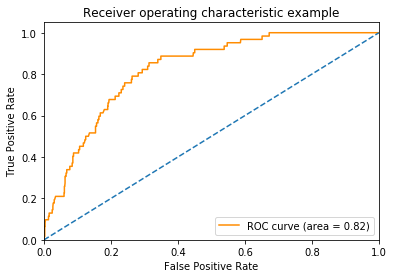

In [53]:
plt.figure()
plt.plot(fpr2, tpr2, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc2)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [41]:
feature_importances = pd.DataFrame(rf_random.best_estimator_.feature_importances_,
                                   index = X_train.columns, columns = ['importance'])
feature_importances.sort_values('importance',ascending=False)[:20]

,importance
daylen,0.108952
Longitude,0.086220
Latitude,0.075703
Tavg,0.066475
Tmax,0.058682
DewPoint,0.055911
Day,0.052919
Month_8,0.052554
Tmin,0.050985
Species_CULEX RESTUANS,0.030910


In [42]:
new_train['WnvPresent'] = y

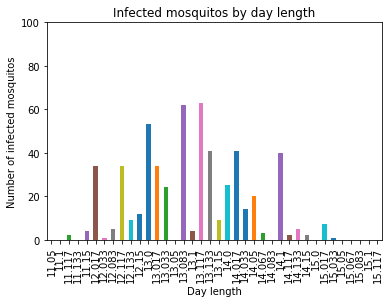

In [43]:
day_data = new_train.groupby('daylen')['WnvPresent'].sum()
day_data = round(day_data,2)
plt.figure()
day_data.plot(kind='bar')
plt.ylim([0.0, 100])
plt.xlabel('Day length')
plt.ylabel('Number of infected mosquitos')
plt.title('Infected mosquitos by day length')
plt.show()

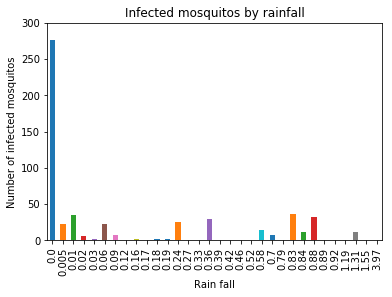

In [44]:
rain_data = new_train.groupby('PrecipTotal')['WnvPresent'].sum()
day_data = round(day_data,2)
plt.figure()
rain_data.plot(kind='bar')
plt.ylim([0.0, 300])
plt.xlabel('Rain fall')
plt.ylabel('Number of infected mosquitos')
plt.title('Infected mosquitos by rainfall')
plt.show()

Submission to kaggle competitions to see how the final model performed on the test set

In [41]:
prediction1 = rf1.predict_proba(test_set)
prediction2 = rf_random.predict_proba(test_set)

In [44]:
sum(prediction2[:,1] > 0.5)

822

In [45]:
sample['WnvPresent'] = prediction1[:,1]
sample2 = sample
sample2['WnvPresent'] = prediction2[:,1]

In [46]:
sample.to_csv('sample1.csv',index = False)
sample2.to_csv('sample2.csv',index = False)

Achieved an AUC of 70% for the test set